# Shanmuga Priyan Jeevanandam
   # C0889053

https://github.com/shanmugapriyan357/Assignment-3---Fashion-MNIST-Classification-with-ANNs-and-Visualizations

# 1. Load and Explore the Fashion MNIST Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist

# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


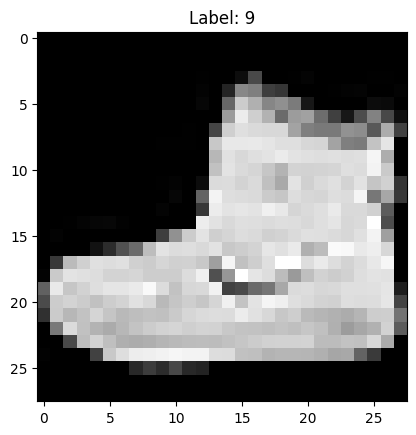

In [2]:
# Exploring the dataset
# Display basic information
print("Training set shape:", train_images.shape)
print("Test set shape:", test_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

# Display the first image and label
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


# 2. Data Preprocessing

In [3]:
# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print the first 10 labels with class names
for i in range(10):
    print(f"Label {train_labels[i]}: {class_names[train_labels[i]]}")


Label 9: Ankle boot
Label 0: T-shirt/top
Label 0: T-shirt/top
Label 3: Dress
Label 0: T-shirt/top
Label 2: Pullover
Label 7: Sneaker
Label 2: Pullover
Label 5: Sandal
Label 5: Sandal


In [9]:
# Count the occurrences of each class label in the training set
class_counts = np.bincount(train_labels)

# Display the count of samples for each class
for i, count in enumerate(class_counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")


Class 0 (T-shirt/top): 6000 samples
Class 1 (Trouser): 6000 samples
Class 2 (Pullover): 6000 samples
Class 3 (Dress): 6000 samples
Class 4 (Coat): 6000 samples
Class 5 (Sandal): 6000 samples
Class 6 (Shirt): 6000 samples
Class 7 (Sneaker): 6000 samples
Class 8 (Bag): 6000 samples
Class 9 (Ankle boot): 6000 samples


In [4]:
# Scale the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print("Training set shape after reshaping:", train_images.shape)
print("Test set shape after reshaping:", test_images.shape)


Training set shape after reshaping: (60000, 28, 28, 1)
Test set shape after reshaping: (10000, 28, 28, 1)


# 3. Visualizations

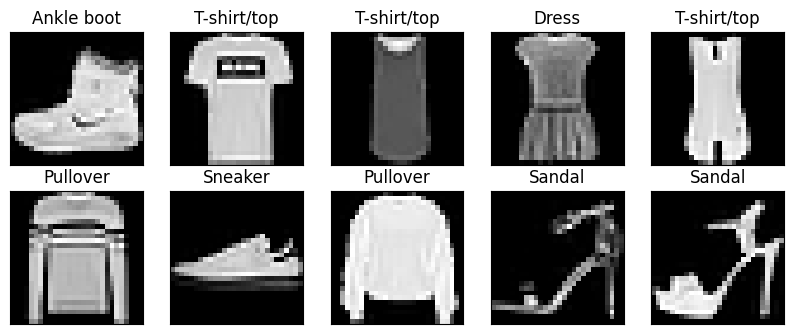

In [5]:
# Display 10 sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()


<ipython-input-8-f65f4624c39d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_labels_df, palette="viridis")


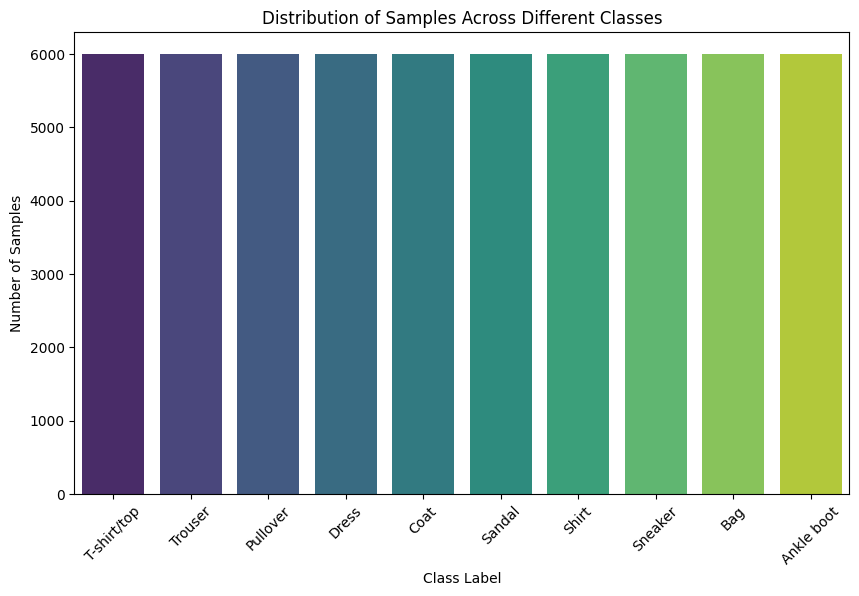

In [8]:
# Bar Chart for Class Distribution
import pandas as pd

# Convert labels to a DataFrame for easier plotting
train_labels_df = pd.DataFrame(train_labels, columns=['label'])

# Plotting the distribution of samples across different classes
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_labels_df, palette="viridis")
plt.title("Distribution of Samples Across Different Classes")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.show()


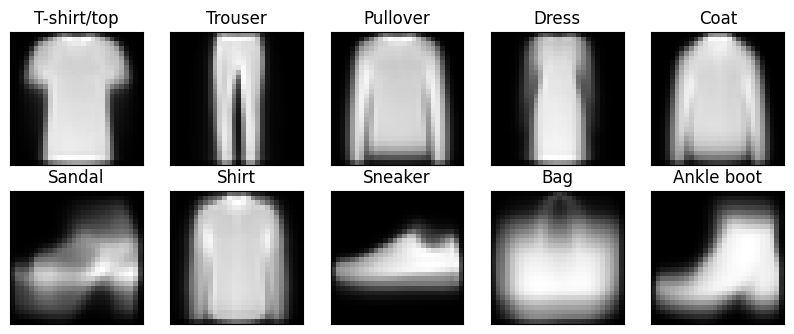

In [10]:
# Calculate the mean image for each class
mean_images = np.zeros((10, 28, 28))
for i in range(10):
    class_images = train_images[train_labels == i]
    mean_images[i] = class_images.mean(axis=0).reshape(28, 28)

# Display the mean images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mean_images[i], cmap='gray')
    plt.title(class_names[i])
plt.show()


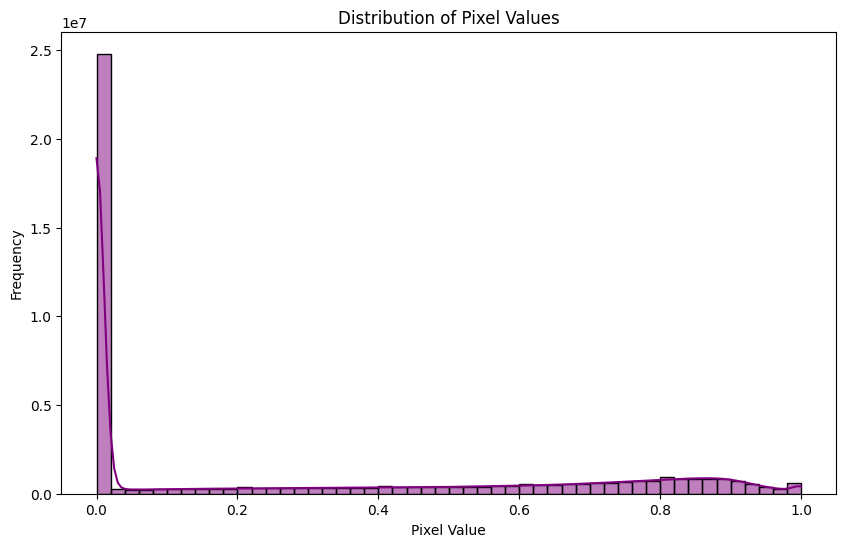

In [11]:
# Flatten the images to create a single array of pixel values
flattened_images = train_images.flatten()

# Plot the distribution of pixel values
plt.figure(figsize=(10, 6))
sns.histplot(flattened_images, bins=50, color='purple', kde=True)
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


# 4. Building an Artificial Neural Network

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 5. Compile the Model

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 6. Training the Model

In [14]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)


Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.5842 - accuracy: 0.8016 - val_loss: 0.4426 - val_accuracy: 0.8459
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.8523 - val_loss: 0.4003 - val_accuracy: 0.8597
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3794 - accuracy: 0.8655 - val_loss: 0.3864 - val_accuracy: 0.8648
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3538 - accuracy: 0.8736 - val_loss: 0.3832 - val_accuracy: 0.8637
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8825 - val_loss: 0.3618 - val_accuracy: 0.8753
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8867 - val_loss: 0.3423 - val_accuracy: 0.8798
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.8896 - val_loss: 0.3611 - val_accuracy: 0.8741
Epoch 

# 7. Evaluate the Model

313/313 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8733
Test accuracy: 0.8733


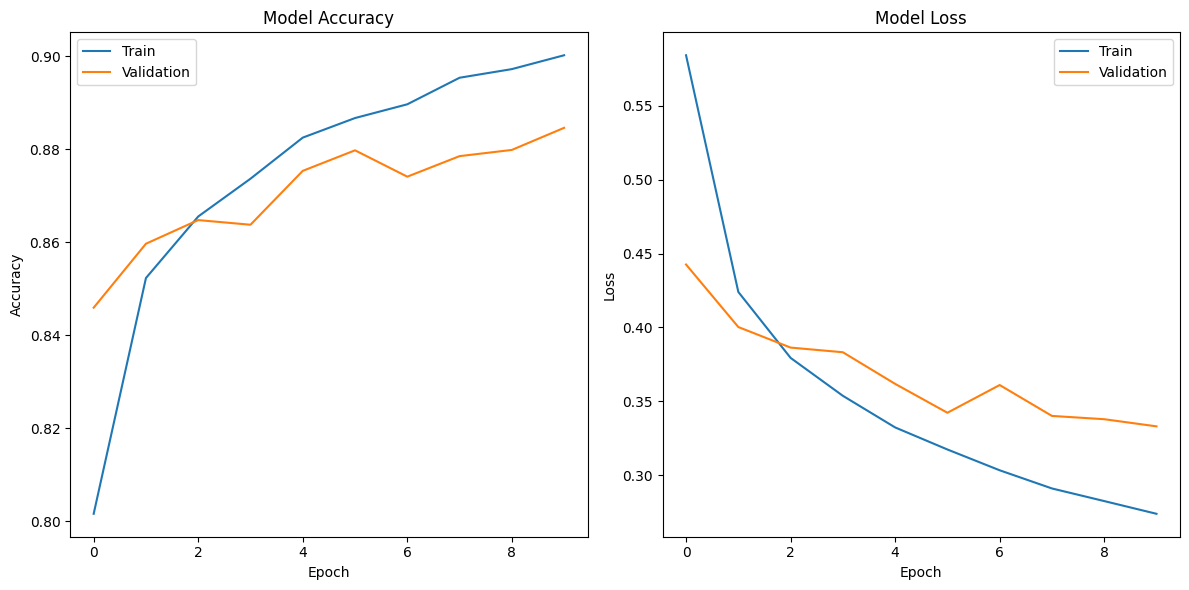

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [16]:
# Save the entire model to a HDF5 file
model.save('fashion_mnist_ann_model.h5')
print("Model saved successfully.")


Model saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CNN Model
Trying to get better performance





In [17]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Training and Evaluation

In [18]:
# Train the CNN model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# Evaluate the CNN model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy after CNN training: {accuracy:.4f}")


Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.5664 - accuracy: 0.7966 - val_loss: 0.3969 - val_accuracy: 0.8610
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3653 - accuracy: 0.8679 - val_loss: 0.3401 - val_accuracy: 0.8777
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3157 - accuracy: 0.8861 - val_loss: 0.3098 - val_accuracy: 0.8879
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2830 - accuracy: 0.8981 - val_loss: 0.2869 - val_accuracy: 0.8972
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2616 - accuracy: 0.9045 - val_loss: 0.2966 - val_accuracy: 0.8917
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2446 - accuracy: 0.9097 - val_loss: 0.2656 - val_accuracy: 0.9068
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2247 - accuracy: 0.9187 - val_loss: 0.2658 - val_accuracy: 0.9051
Epoch 

Got better test accuracy for CNN (90.61) compared to ANN (87.33)

In [19]:
# Save the model
model.save('fashion_mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 8. Test Set Prediction

In [22]:
from keras.models import load_model
# Load the previously saved model
loaded_model = load_model('fashion_mnist_cnn_model.h5')

In [23]:
# Use the loaded model to predict classes for the test set
predictions = loaded_model.predict(test_images)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 2ms/step


Display Sample Predictions and Images

In [24]:
# Function to display sample predictions

def display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples//2, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [25]:
# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


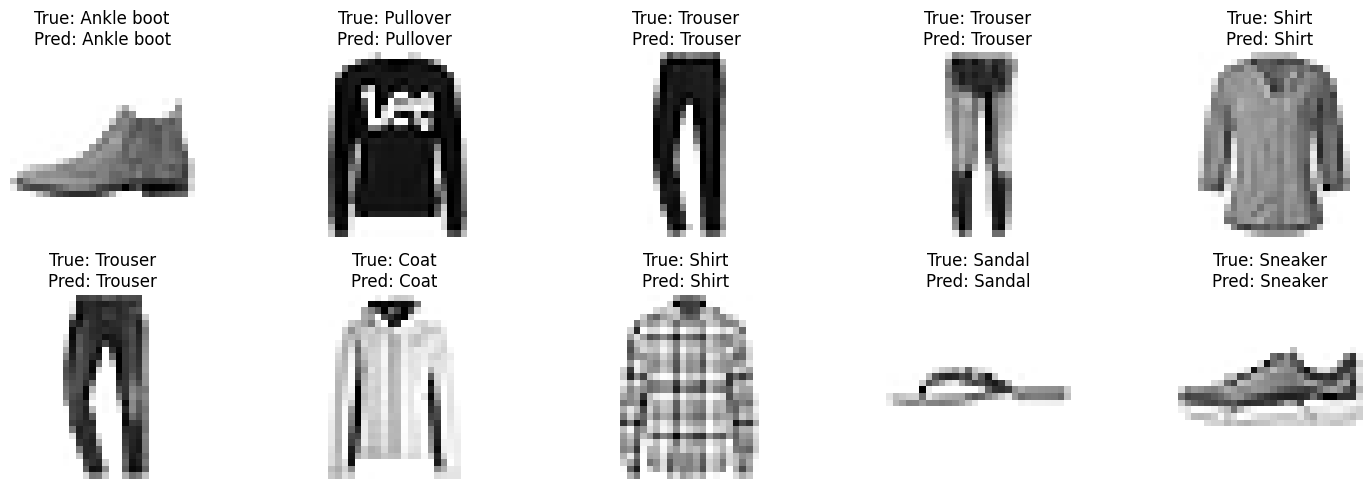

In [26]:
# Display sample predictions
display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10)